In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
# Define the path to the folder containing the CSV files
folder_path = '/Users/namirsacic/tokenized-assets/data_analysis/processed_data/merged_data'

# Initialize an empty list to store the data frames
df_list = []

# Loop through all the files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        # Read in the CSV file as a data frame and append it to the list
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        df_list.append(df)

In [5]:
conc_dfs.head()

,Unnamed: 0,id,price,size,side,liquidation,time,datetime,day,price*size,adjusted_size,average,premium,premium*size
0,0,5400638297,170.85,0.005,-1,False,2022-11-10T08:19:28.877224+00:00,2022-11-10 08:20:00,2022-11-10,0.85425,-0.005,166.2425,0.027716,0.000139
1,1,5398939597,170.85,0.150,-1,False,2022-11-10T04:50:43.345778+00:00,2022-11-10 04:51:00,2022-11-10,25.62750,-0.150,166.2425,0.027716,0.004157
2,2,5398939596,170.85,0.105,-1,False,2022-11-10T04:50:43.345778+00:00,2022-11-10 04:51:00,2022-11-10,17.93925,-0.105,166.2425,0.027716,0.002910
3,3,5398845884,170.85,0.100,-1,False,2022-11-10T04:30:22.994671+00:00,2022-11-10 04:31:00,2022-11-10,17.08500,-0.100,166.2425,0.027716,0.002772
4,4,5398821410,170.85,0.100,-1,False,2022-11-10T04:26:19.313772+00:00,2022-11-10 04:27:00,2022-11-10,17.08500,-0.100,166.2425,0.027716,0.002772


In [3]:
# Concatenate the data frames
conc_dfs = pd.concat(df_list)

# Display information about the concatenated data frame
print(conc_dfs.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219522 entries, 0 to 74116
Data columns (total 14 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Unnamed: 0     1219522 non-null  int64  
 1   id             1219522 non-null  int64  
 2   price          1219522 non-null  float64
 3   size           1219522 non-null  float64
 4   side           1219522 non-null  int64  
 5   liquidation    1219522 non-null  bool   
 6   time           1219522 non-null  object 
 7   datetime       1219522 non-null  object 
 8   day            1219522 non-null  object 
 9   price*size     1219522 non-null  float64
 10  adjusted_size  1219522 non-null  float64
 11  average        1219522 non-null  float64
 12  premium        1219522 non-null  float64
 13  premium*size   1219522 non-null  float64
dtypes: bool(1), float64(7), int64(3), object(3)
memory usage: 131.4+ MB
None


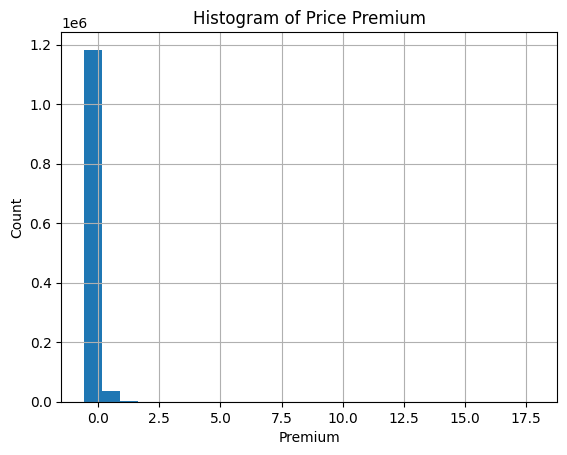

In [4]:
# Create a histogram of the 'premium' column
conc_dfs['premium'].hist(bins=25)

# Add labels and titles to the histogram
plt.title('Histogram of Price Premium')
plt.xlabel('Premium')
plt.ylabel('Count')

# Show the plot
plt.show()

In [11]:
conc_dfs.describe()

,Unnamed: 0,id,price,size,side,price*size,adjusted_size,average,premium,premium*size
count,1.198008e+06,1.198008e+06,1.198008e+06,1.198008e+06,1.198008e+06,1.198008e+06,1.198008e+06,1.198008e+06,1.198008e+06,1.198008e+06
mean,2.437951e+03,3.628093e+09,1.589262e+02,1.139695e+01,1.607335e-02,7.364245e+02,-1.087170e-02,1.563774e+02,1.414715e-02,3.181006e-02
std,1.441166e+03,1.613355e+09,1.403636e+02,9.168551e+01,9.998712e-01,4.774686e+03,9.239114e+01,1.374128e+02,1.175912e-01,2.273438e+00
min,0.000000e+00,1.612524e+08,9.932000e-01,1.000000e-03,-1.000000e+00,4.715000e-02,-2.245890e+04,9.901250e-01,-5.906263e-01,-3.542303e+02
25%,1.187000e+03,2.421044e+09,4.092000e+01,2.000000e-02,-1.000000e+00,2.645500e+00,-2.000000e-01,4.088000e+01,-1.719479e-03,-1.855109e-04
50%,2.405000e+03,3.991259e+09,1.176700e+02,1.900000e-01,1.000000e+00,1.602235e+01,1.000000e-03,1.171024e+02,1.334866e-03,4.339500e-05
75%,3.676000e+03,5.081300e+09,2.400000e+02,2.100000e+00,1.000000e+00,1.783200e+02,1.500000e-01,2.343197e+02,5.836621e-03,2.584612e-03
max,4.999000e+03,5.400950e+09,1.350855e+03,2.245890e+04,1.000000e+00,7.279876e+05,1.472420e+04,1.300231e+03,1.785747e+01,5.440227e+02


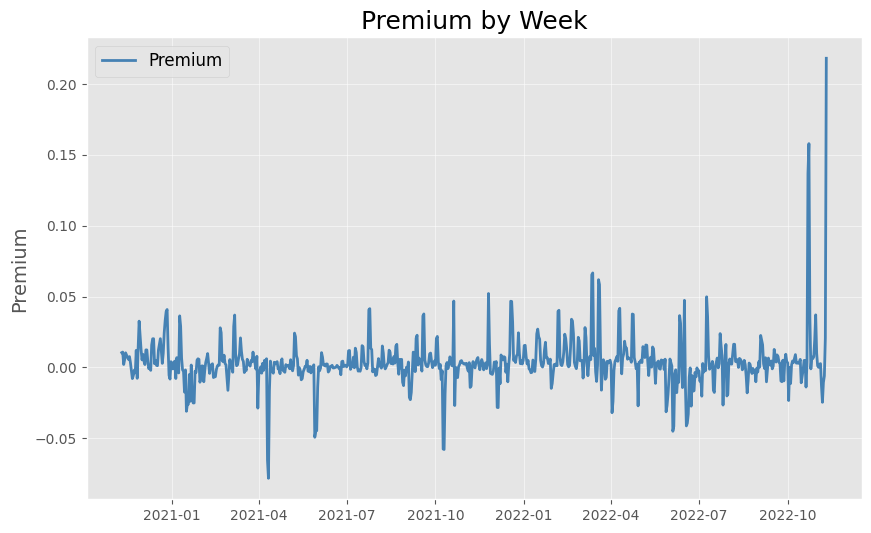

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# assuming your dataframe is called "df"
df['week'] = pd.to_datetime(df['day']) # group by week
grouped_df = df.groupby('week')['premium'].mean().reset_index() # calculate the mean premium for each week

x = grouped_df['week'] # x-axis values
y = grouped_df['premium'] # y-axis values

# set the style of the plot
plt.style.use('ggplot')

# create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, color='steelblue', linewidth=2,label='Premium')

# set the x and y labels, and the title
ax.set_ylabel('Premium', fontsize=14)
ax.set_title('Premium by Week', fontsize=18)

# add a legend and gridlines
ax.legend(fontsize=12)
ax.grid(True, alpha=0.5)

plt.show()

Text(0.5, 1.0, 'Premiums over Time')

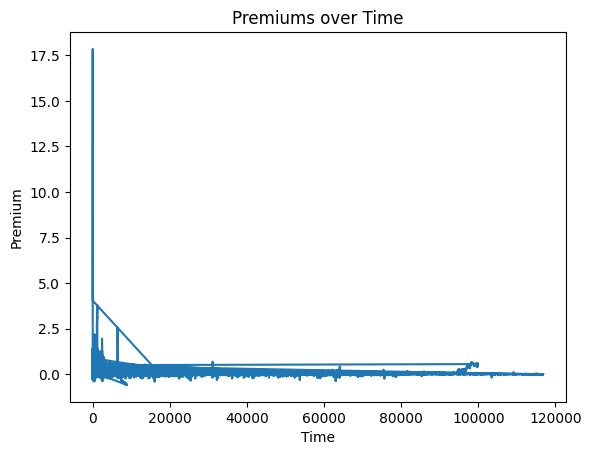

In [12]:
# Plot over time doesn't really make sense

# conc_dfs.set_index('datetime', inplace=True)
# conc_dfs.reset_index(drop=True, inplace=True)
conc_dfs['premium'].plot()
plt.xlabel('Time')
plt.ylabel('Premium')
plt.title('Premiums over Time')

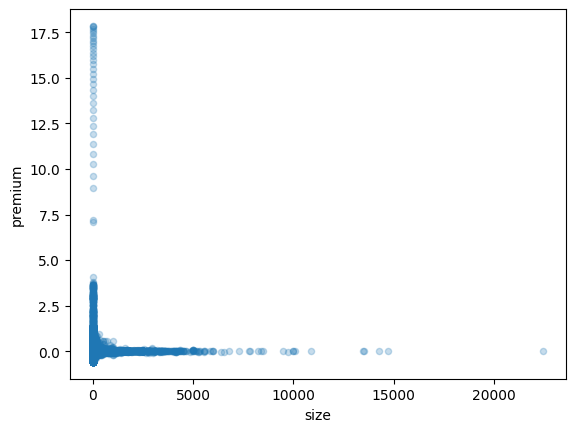

In [13]:
conc_dfs.plot.scatter(x = 'size', y = 'premium', alpha = 0.25)
# plt.xlim(-100, 1000)
plt.show()

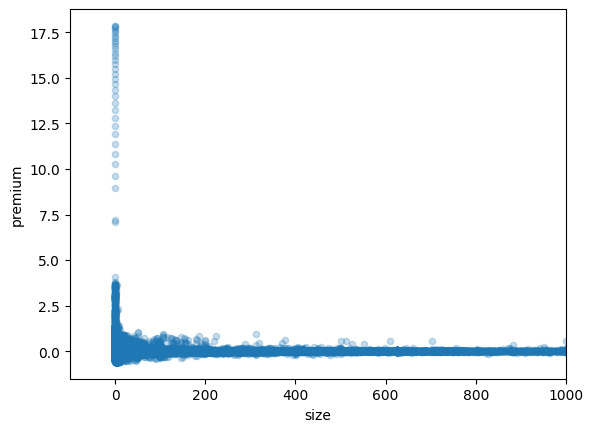

In [14]:
conc_dfs.plot.scatter(x = 'size', y = 'premium', alpha = 0.25)
plt.xlim(-100, 1000)
plt.show()